# Template Notebook

## Setup

### Standard library imports

In [2]:
%load_ext autoreload

In [3]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [4]:
%autoreload 2

import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from source.spea_optimizer import SPEAOptimizer

In [5]:
sns.set()

### Setup objective function

In [73]:
def schaffer_function(x):
    f1 = -x * (x <= 1) + (x - 2) * (1 < x <= 3) + (4 - x) * (3 < x <= 4) + (x - 4) * (x > 4)
    return [f1, (x - 5)**2]

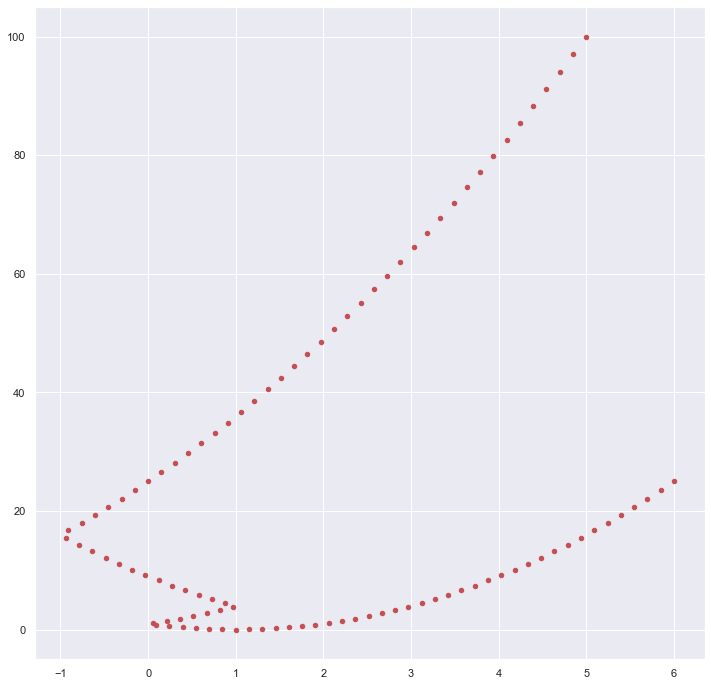

In [74]:
plt.figure(figsize=[12, 12])

x = np.linspace(-5, 10, 100).reshape(-1, 1)
values = np.apply_along_axis(schaffer_function, 1, x)
plt.scatter(values[:, 0], values[:, 1], c="r", s=20)

In [75]:
optimzier = SPEAOptimizer(
    schaffer_function,
    n_dim=1,
    mode="min",
    mutation_operator="gaussian",
    crossover_operator="center",
    selection_operator="binary_tournament",
    clustering_method="mean_shift"
)

In [81]:
history = optimzier.optimize(
    generations=200,
    population_size=100,
    crossover_rate=0.8,
    mutation_rate=0.4,
    reducing_period=1,
    search_range=((-5, 10),),
    mutation_strength=1,
    clustering_parameters={"max_iter": 50},
    silent=False,
    logging=False,
    logging_path="../data/schaffer_logs_2.csv"
)

100%|██████████| 200/200 [01:01<00:00,  3.34it/s]


In [78]:
pareto_front = optimzier.pareto_front(n_solutions=40)

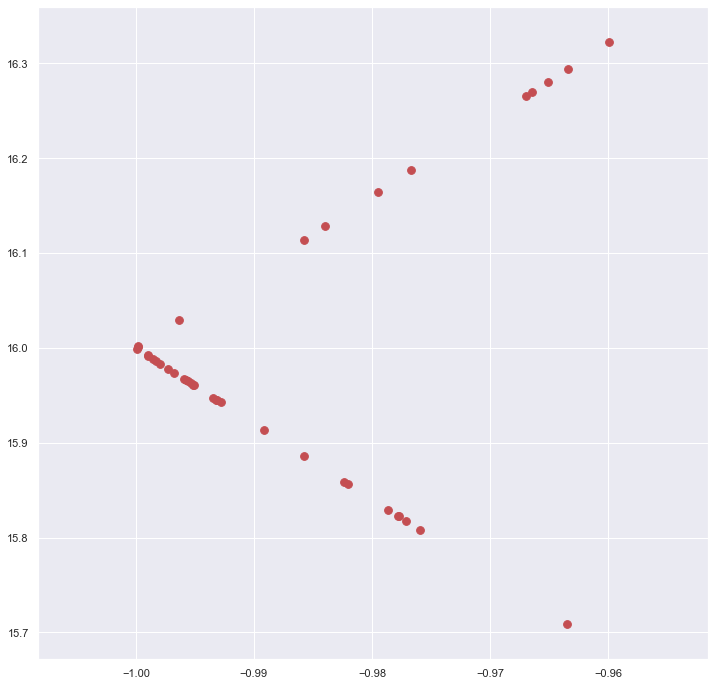

In [79]:
plt.figure(figsize=[12, 12])

# inputs_values = pareto_front.reshape(-1, 1)
values = np.apply_along_axis(schaffer_function, 1, pareto_front)
plt.scatter(values[:, 0], values[:, 1], c="r", s=60)

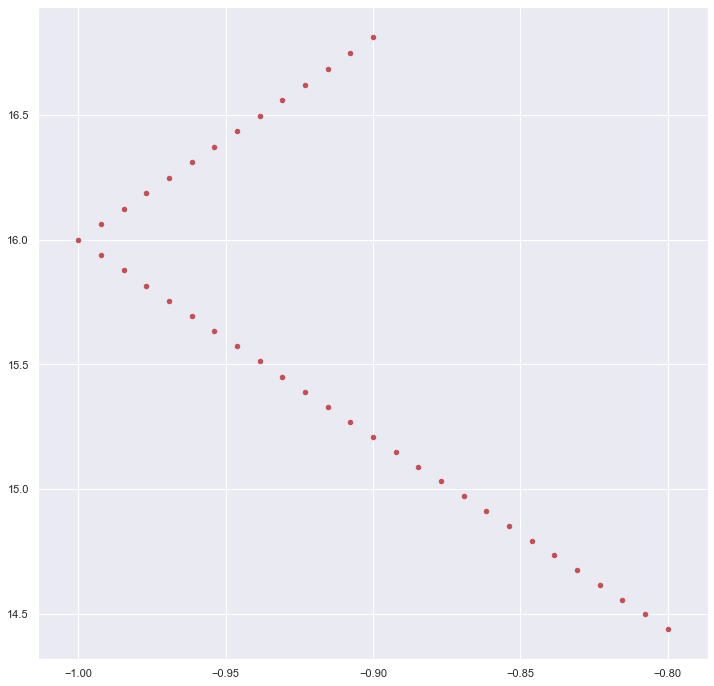

In [87]:
plt.figure(figsize=[12, 12])

x = np.linspace(0.9, 1.2, 40).reshape(-1, 1)
values = np.apply_along_axis(schaffer_function, 1, x)
plt.scatter(values[:, 0], values[:, 1], c="r", s=20)

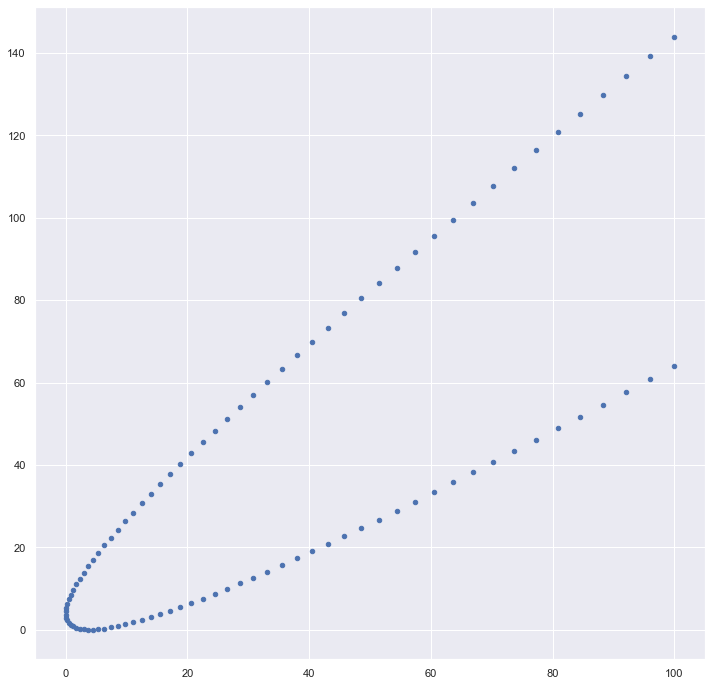

In [35]:
plt.figure(figsize=[12, 12])

t = np.linspace(-10, 10, 100)
t_values = np.apply_along_axis(schaffer_function, 0, t)
plt.scatter(t_values[0, :], t_values[1, :], c="b", s=20)